# CH04 特徵工程
Machine learning 需要擷取特徵，沒辦法擷取特徵使用Deep learning
<b>1.特徵選取(Feature Selection)，特徵轉換(Feature Transformation)，特徵抽取 (Feature Extration:Feature Engineering) </b><br>
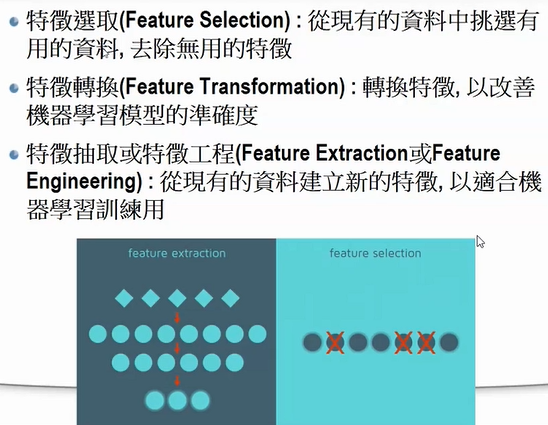
<b>2.特徵選取: 常用方法</b>
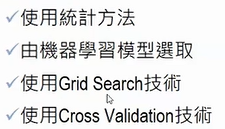   
<b>3.特徵轉換: 常用方法</b>
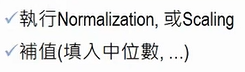
<b>4.特徵抽取(特徵工程): 常用方法</b>
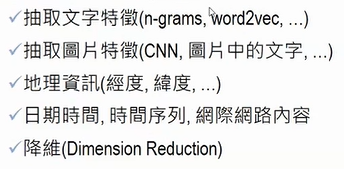

### 補充 program debug
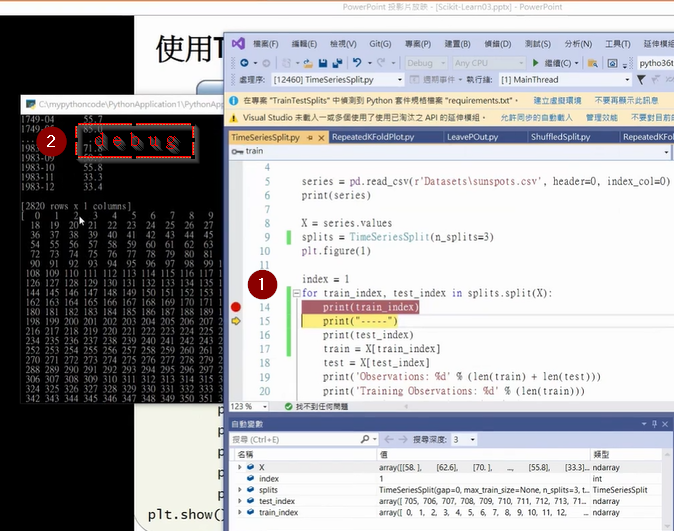

### (1) Dimension Reduction
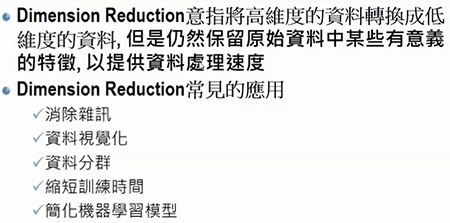

### (2) Feature Selection
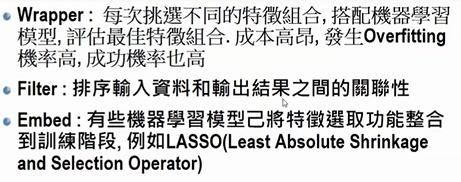

### Lasso 演算法
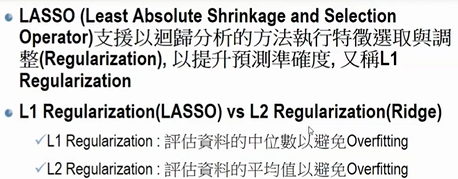
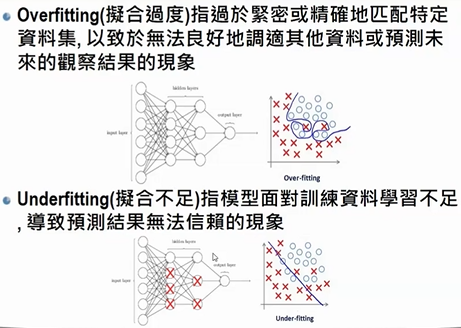
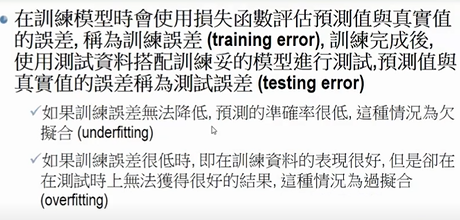
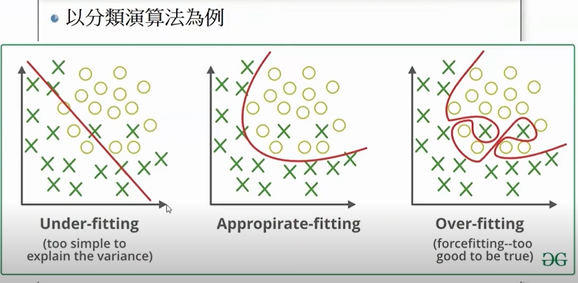
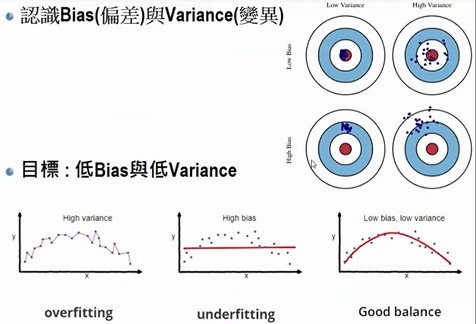

### 認識超參數 Hyperparamater
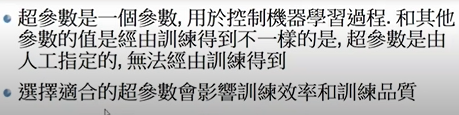

### 實作 Feature Selection
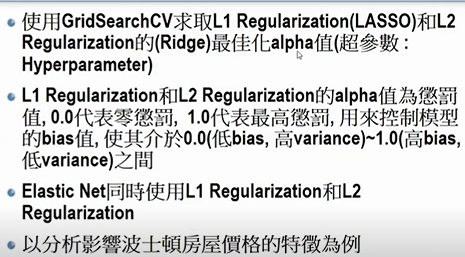
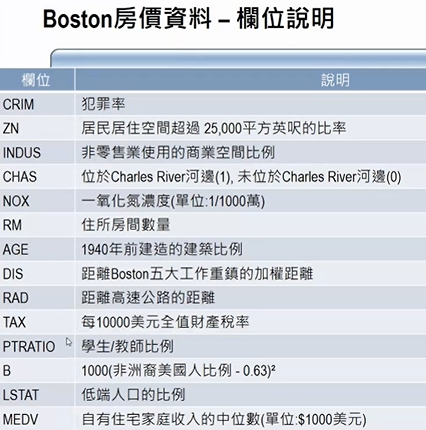

### GridSearchCV
名字其實可以拆分爲兩部分，GridSearch和CV，即網格搜索和交叉驗證。這兩個名字都非常好理解。網格搜索，搜索的是參數，即在指定的參數範圍內，
按步長依次調整參數，利用調整的參數訓練學習器，從所有的參數中找到在驗證集上精度最高的參數，這其實是一個訓練和比較的過程。

GridSearchCV可以保證在指定的參數範圍內找到精度最高的參數，但是這也是網格搜索的缺陷所在，他要求遍歷所有可能參數的組合，
在面對大數據集和多參數的情況下，非常耗時。

GridSearchCV 函數會自動作Cross Validation，並且統計準確率的平均數/標準差，幫我們找出最佳參數組合，我們現在就整合Tensorflow與GridSearchCV，試作一範例說明如下，檔案名稱為04_06_GridSearchCV.ipynb。

重要的程式片段如下：
##### 建立模型 =====================================
def create_model(learn_rate=0.01, neurons=128):              <br>
    model = tf.keras.models.Sequential([                     <br>
      tf.keras.layers.Flatten(input_shape=(28, 28)),         <br>
      tf.keras.layers.Dense(neurons, activation='relu'),         <br>
      tf.keras.layers.Dropout(0.2),         <br>
      tf.keras.layers.Dense(10, activation='softmax')             ])<br>
    # 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別         <br>
    model.compile(optimizer='adam',         <br>
                  loss='sparse_categorical_crossentropy',         <br>
                  metrics=['accuracy'])         <br>
    return model
##### 建立模型，並以 KerasClassifier 包起來，提供 GridSearchCV 使用 ===
from sklearn.model_selection import GridSearchCV         <br>
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=5, verbose=1)         
##### 定義參數各種組合 ====================================
neurons = [16, 128, 512]         <br>
learn_rate = [0.1, 0.01, 0.001]         <br>
param_grid = dict(learn_rate=learn_rate, neurons=neurons)         <br>
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)         
##### 訓練 ==================================================
grid_result = grid.fit(x_train_norm, y_train)       
##### 評估，打分數 =============================================         
print(f"最佳準確率: {grid_result.best_score_}，最佳參數組合：{grid_result.best_params_}")
###### 取得 cross validation 的平均準確率及標準差 ===================
means = grid_result.cv_results_['mean_test_score']<br>
stds = grid_result.cv_results_['std_test_score']<br>
params = grid_result.cv_results_['params']<br>
for mean, stdev, param in zip(means, stds, params):<br>
    print(f"平均準確率: {mean}, 標準差: {stdev}, 參數組合: {param}")

讀取並檢視訓練資料 df_head()===================================================


C:\Users\mikal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


讀取並檢視訓練資料 df_isnull_sum()==================================================
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64
讀取並檢視訓練資料 df_info() data types ==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.231290,-0.482143,1.157222,-0.254179,0.399466,-0.560138,0.371580,-0.637272,-0.552173,-0.074206,-1.785651,-1.312626,-0.120681
1,-0.382326,-0.482143,-0.232693,-0.254179,-0.119485,0.193524,-0.054185,-0.115918,-0.664203,-0.648757,-0.064321,0.436240,-0.371215
2,-0.418341,-0.482143,-1.239233,-0.254179,-0.961717,1.736665,-0.220943,-0.133491,-0.888265,-0.811256,-0.250411,0.453875,-0.958141
3,-0.420424,0.889908,-1.341180,-0.254179,-0.732017,0.890474,0.055804,-0.280720,-0.328111,-1.124648,-0.064321,0.453875,-0.769537
4,4.060100,-0.482143,0.944715,-0.254179,1.148117,-1.076508,0.591558,-1.022892,1.576411,1.452127,0.773082,-0.249846,2.024344


Linear Regression  # R2高者為佳， MSE低者為佳============================================
Training r^2: linreg.score: 0.758
Test r^2:linreg.score:  0.675
Training MSE:  18.879
Test MSE:  32.443
Lasso, alpha=1 ===================================================
Training r^2:lasso.score: 0.678
Test r^2:lasso.score:  0.611
Training MSE:  25.096
Test MSE:  38.755

Ridge, alpha=1 ===================================================
Training r^2 :ridge.score: 0.758
Test r^2::ridge.score:  0.674
Training MSE:  18.881
Test MSE:  32.454
tuned_parameter: 間隔的aipha value =
[{'alpha': array([1.00000000e-10, 1.02567793e-10, 1.05201522e-10, 1.07902879e-10,
       1.10673602e-10, 1.13515471e-10, 1.16430313e-10, 1.19420003e-10,
       1.22486461e-10, 1.25631660e-10, 1.28857621e-10, 1.32166418e-10,
       1.35560179e-10, 1.39041083e-10, 1.42611371e-10, 1.46273336e-10,
       1.50029332e-10, 1.53881775e-10, 1.57833141e-10, 1.61885969e-10,
       1.66042866e-10, 1.70306503e-10, 1.74679622e-10, 1.79165033e-10,
     


The optimal alpha value is :0.010642092440647224 - found by GridSearch


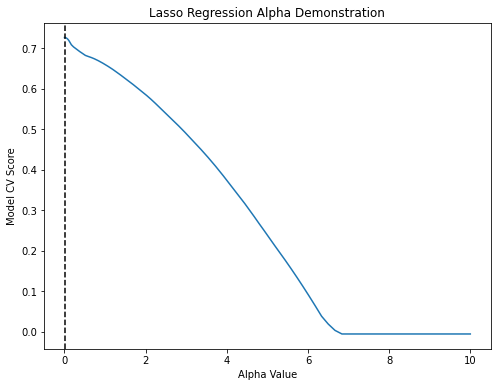

Lasso, alpha=0.010642092440647224
----------------------------------------------------------------------------------------------------
 R2 and MSE for training and test sets round to the nearest .001===========
Training r^2: 0.757
Test r^2:  0.675
Training MSE:  18.885
Test MSE:  32.440
Lasso model: -1.134 * X0 + 1.343 * X1 + -0.119 * X2 + 0.3 * X3 + -1.738 * X4 + 2.369 * X5 + 0.271 * X6 + -3.06 * X7 + 2.448 * X8 + -1.974 * X9 + -1.789 * X10 + 1.19 * X11 + -3.795 * X12
The optimal alpha value is: 2.971295818577334 - found by GridSearch


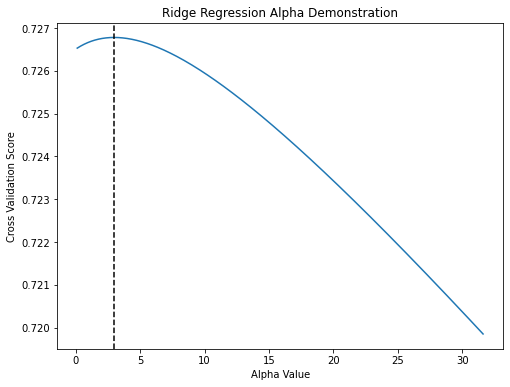

 R2 and MSE for training and test sets round to the nearest .001
Ridge, alpha=2.971295818577334

----------------------------------------------------------------------------------------------------
Training r^2: 0.757
Test r^2:  0.674
Training MSE:  18.893
Test MSE:  32.482
Ridge model: -1.132 * X0 + 1.325 * X1 + -0.173 * X2 + 0.316 * X3 + -1.71 * X4 + 2.383 * X5 + 0.288 * X6 + -3.011 * X7 + 2.355 * X8 + -1.875 * X9 + -1.781 * X10 + 1.192 * X11 + -3.755 * X12

****************************************************************************************************
Simple Linear Regression - using test data
Test r^2:  0.675
Test MSE:  32.443
Number of model features: 13
Linear Regression model: -1.165 * X0 + 1.385 * X1 + -0.114 * X2 + 0.302 * X3 + -1.809 * X4 + 2.342 * X5 + 0.324 * X6 + -3.122 * X7 + 2.611 * X8 + -2.104 * X9 + -1.808 * X10 + 1.196 * X11 + -3.814 * X12
****************************************************************************************************
Lasso Regression - using

In [6]:
#Regularization with Ridge, Lasso, and Elastic Net Regressions(https://towardsdatascience.com/what-is-regularization-and-how-do-i-use-it-f7008b5a68c6)
# Use GridSearch 求取Lasso(L1) & Ridge(L2) 最佳alpha
# 1.引用必要套件 ========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston 
# 2.定義顯示輸入資料名稱與係數的 Regularization 公式==========================================
def pretty_print_coefs(coefs, names = None): # coefs is alpha值, names is Feature
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

# 3.讀取並檢視訓練資料 =====================================================================
#load in a data set
data = load_boston()
#View description of data
#print(data.DESCR)
# Create Dataframe of data
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['target'] = data.target #房價
#preview data
print("讀取並檢視訓練資料 df_head()===================================================")
display(df.head())
#check to see if there are any null values in data set
print("讀取並檢視訓練資料 df_isnull_sum()==================================================")
print(df.isnull().sum())
#checking data types
print("讀取並檢視訓練資料 df_info() data types ==================================================")
print(df.info())

# 4.執行資訊轉換，並檢視轉換後的結果 =========================================================
#Split data into target variable (Y) and observable variables (X)
Y = df.target
X = df.drop(columns='target')  # 影響房價的特徵
#split data into test and train datasets
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=10)
# Create Scaler Object  
scaled_data = StandardScaler()  #  正規化 x_train  
# Fit and transform Data to Scaler Object
x_train_scaled = scaled_data.fit_transform(x_train)
x_test_scaled = scaled_data.transform(x_test)
# Print separator dashes and view data
print('-'*100)
print('Transformed Data:StandardScaler 後x_train_scaled=====================')
display(pd.DataFrame(x_train_scaled, columns=data.feature_names).head())

# 5.use LinearRegression() 演算法， alpha =1 進行預測 ================================================
# Fit the model  
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Linear Regression  # R2高者為佳， MSE低者為佳============================================')
print(f'Training r^2: linreg.score: {linreg.score(x_train_scaled, y_train):.3f}') # R2高者為佳
print(f'Test r^2:linreg.score: {linreg.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, linreg.predict(x_train_scaled)): .3f}') # MSE低者為佳
print(f'Test MSE: {mean_squared_error(y_test, linreg.predict(x_test_scaled)): .3f}')

# 6.use Lasso 演算法， alpha =1 進行預測 ================================================
# Lasso is also known as the L1 norm 
# Default alpha value is 1
lasso = Lasso(alpha=1,random_state=1) # alpha 值用GridSearchCV 找最佳值 再帶回Lasso 用
lasso.fit(x_train_scaled, y_train)
##See how many variables were removed
#print(f'There are {len(lasso.coef_)} total parameters')
#print(f'There have been {sum((abs(lasso.coef_) > 0))} features removed with an alpha value of {lasso.alpha}')
#print(f'There are {100 - sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_)*100:.3}% of the original parameters')
#print('-'*100)
# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Lasso, alpha=1 ===================================================')
print(f'Training r^2:lasso.score: {lasso.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2:lasso.score: {lasso.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, lasso.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(x_test_scaled)): .3f}')

# 6.use Ridge 演算法， alpha =1 進行預測 ================================================
# Ridge is also known as the L2 norm
# Alpha default is 1.0
ridge = Ridge(alpha= 1,random_state = 1)
ridge.fit(x_train_scaled, y_train)

print("")
print(f'Ridge, alpha=1 ===================================================')
print(f'Training r^2 :ridge.score: {ridge.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2::ridge.score: {ridge.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, ridge.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(x_test_scaled)): .3f}')

# 7.用 GridSearchCV 求取Lasso & Ridge 最佳alpha ========================================

# for Lasso Finding Optimized Lasso Alpha Value ===================================================
# Create an array of alpha values to test
# Start np.linspace value is 10**-10 because a value of 0 throws warnings
# numpy.logspace(l, u, n) 函式也將下限 l、上限 u 和返回 n 的值的數量作為輸入引數，並返回 n 個上下限內的對數值彼此均勻分隔。
alphas = np.logspace(-10, 1, 1000,base=10) # base is log 基底是10
# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]
print(f"tuned_parameter: 間隔的aipha value =\n{tuned_parameters}")
# Specify number of folds for cross_validation
#n_folds = 5
# Create grid search instance using desired variables
clf_lasso = GridSearchCV(lasso, tuned_parameters, cv=5, refit=True) # cv=5 做5次
clf_lasso.fit(x_train_scaled, y_train)
lasso_scores = clf_lasso.cv_results_['mean_test_score']
# Plot the results
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, lasso_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Model CV Score')
plt.title('Lasso Regression Alpha Demonstration')
plt.axvline(clf_lasso.best_params_['alpha'], color='k', linestyle='--')
print("")
print(f'The optimal alpha value is :{clf_lasso.best_params_["alpha"]} - found by GridSearch')
plt.show()
### Creating Optimized Lasso Regression
lasso_optimized_alpha = clf_lasso.best_params_['alpha']
# Default alpha value is 1
lasso = Lasso(alpha=lasso_optimized_alpha,random_state=1) 
lasso.fit(x_train_scaled, y_train)
## See how many variables were removed
print(f'Lasso, alpha={lasso_optimized_alpha}')
#print(f'There are {len(lasso.coef_)} total parameters')
#print(f'There have been {sum((abs(lasso.coef_) > 0))} features removed with an alpha value of {lasso.alpha}')
#print(f'There are {100 - sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_)*100:.4}% of the original parameters')
print('-'*100)
print(" R2 and MSE for training and test sets round to the nearest .001===========")
print(f'Training r^2: {lasso.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {lasso.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, lasso.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(x_test_scaled)): .3f}')
print ("Lasso model:", pretty_print_coefs(lasso.coef_))

# for Ridge Create an array of alpha values to test ====================================================
alphas = np.logspace(-1, 1.5, 500,base=10)
# Create a Ridge model instance
ridge = Ridge(random_state=0, max_iter=10000,alpha=alphas)
# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]
# Specify number of folds for cross_validation
#n_folds = 5

# Create grid search instance using desired variables
clf_ridge = GridSearchCV(ridge, tuned_parameters, cv=5, refit=False)
clf_ridge.fit(x_train_scaled, y_train)
ridge_scores = clf_ridge.cv_results_['mean_test_score']

# Plot the Figure
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, ridge_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Cross Validation Score')
plt.title('Ridge Regression Alpha Demonstration')
plt.axvline(clf_ridge.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is: {clf_ridge.best_params_["alpha"]} - found by GridSearch')
plt.show()
# Set alpha = optimized alpha value
ridge_optimized_alpha = clf_ridge.best_params_['alpha']
# Default alpha value is 1
ridge = Ridge(alpha=ridge_optimized_alpha,random_state=1) 
ridge.fit(x_train_scaled, y_train)
print(" R2 and MSE for training and test sets round to the nearest .001")
print(f'Ridge, alpha={ridge_optimized_alpha}')
#print(f'There are {len(ridge.coef_)} total parameters')
#print(f'There have been {sum((abs(ridge.coef_) > 0))} features removed with an alpha value of {ridge.alpha}')
#print(f'There are {100 - sum(abs(ridge.coef_) < 10**(-10))/ len(ridge.coef_)*100:.4}% of the original parameters')
print("")
print('-'*100)
print(f'Training r^2: {ridge.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {ridge.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, ridge.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(x_test_scaled)): .3f}')
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

# Simple Linear Regression
print("")
print('*'*100)
print('Simple Linear Regression - using test data')
print(f'Test r^2: {linreg.score(x_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, linreg.predict(x_test_scaled)): .3f}')
print(f'Number of model features: {linreg.n_features_in_}')
print ("Linear Regression model:", pretty_print_coefs(linreg.coef_))

print('*'*100)
# Lasso Regression 
print('Lasso Regression - using test data')
print(f'Test r^2: {lasso.score(x_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(x_test_scaled)): .3f}')
print(f'Number of model features: {lasso.n_features_in_}')
print ("Ridge model:", pretty_print_coefs(lasso.coef_))

print('*'*100)
# Ridge Regression
print('Ridge Regression - using test data')
print(f'Test r^2: {ridge.score(x_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(x_test_scaled)): .3f}')
print(f'Number of model features: {ridge.n_features_in_}')
print ("Ridge model:", pretty_print_coefs(ridge.coef_)) # ridge.coef_ is 係數

#########################################################################
# 程式目的是 feature selection : 挑出正向影響&負向影響 係數大的幾個特徵分析 #
#########################################################################
# Ridge model X0 表示 Feature 1 的參數 : 找係數最表示該特徵影響房價越大價越大，三種方法分析皆是第13個特徵影響嘴大
# 係數正的表示正向影響，負的表示負向影響，挑出正向影響&負向影響 係數大的幾個特徵分析
#      -1.132 * X0 + 1.325 * X1 + -0.173 * X2 + 0.316 * X3 + -1.71 * X4 + 2.383 * X5 + 0.288 * X6 +
#              -3.011 * X7 + 2.355 * X8 + -1.875 * X9 + -1.781 * X10 + 1.192 * X11 + -3.755 * X12

### (3) Feature Extraction: extraction is 經過某些計算get Feature
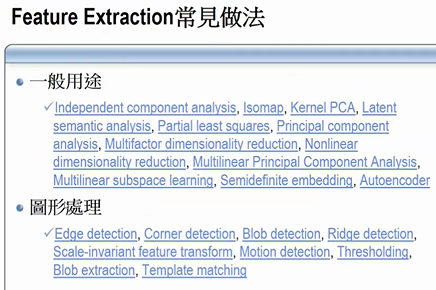
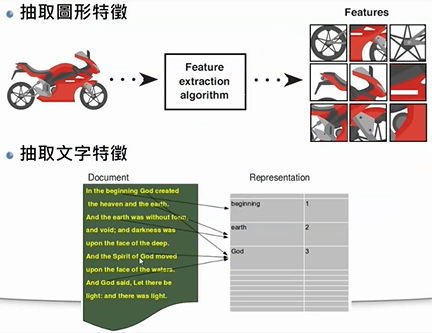
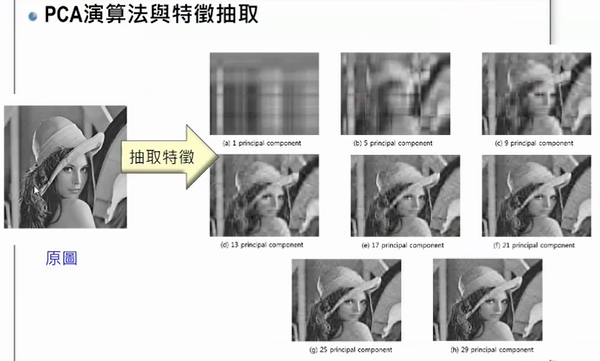
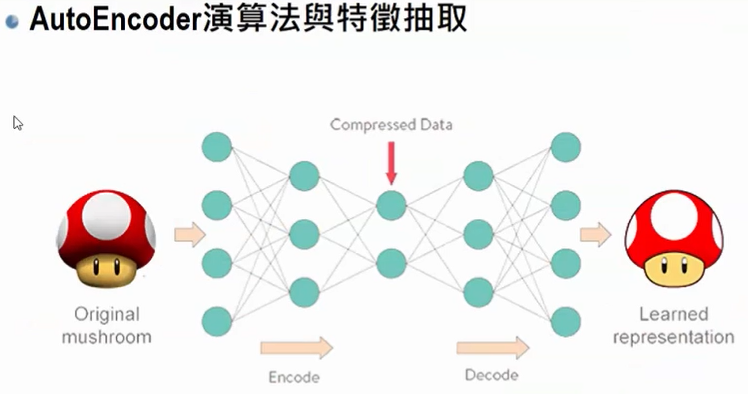

### Example : 分析影響糖尿病的特徵
#### 1.get 糖尿病資料 :Outcome 0 表示沒有，1表示有病

In [11]:
# Beginner's Guide to Feature Selection in Python(https://www.datacamp.com/community/tutorials/feature-selection-python)
import pandas as pd
import numpy as np
# load data
data = pd.read_csv(r"Datasets\diabetes.csv")
display(data.head())
print(data.shape)
array = data.values
X = array[:,0:8]  # 8 Feature
Y = array[:,8]    # Target
# print(X)
# print(Y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


#### (1)SelectKBest: Feature extraction using SelectKBest: get 4個重要特徵;血糖，胰島素,BMI,年齡

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # 挑重要的特徵

test = SelectKBest(score_func=chi2, k=4)  # 挑前4個重要的特徵
fit = test.fit(X, Y)
# Summarize scores
np.set_printoptions(precision=3) # 小數點3位
print('fit.scores =\n',fit.scores_) # 依據 fit.scores_ 最大的依序挑出Feature

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

fit.scores =
 [ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


#### (2)RFE :  Feature extraction using RFE : get 懷孕，BMI，家族病史

In [20]:
# Feature extraction using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


C:\Users\mikal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### (3)Linear Regression: Feature extraction using Linear Regression:懷孕，BMI，家族病史
<b>得到的相關係數，正的越大越好，負的對結果貢獻不高(判斷糖尿病取正數)</b>

In [17]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X,Y)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Linear Regression model:", pretty_print_coefs(linreg.coef_))

Linear Regression model: 0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.147 * X6 + 0.003 * X7


#### (4)Feature extraction using Lasso:懷孕，BMI，家族病史
<b> 得到的相關係數，正的越大越好，負的對結果貢獻不高(判斷糖尿病取正數)</b>

In [18]:
# Feature extraction using Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X,Y)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("LASSO model:", pretty_print_coefs(lasso.coef_))



LASSO model: 0.019 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.05 * X6 + 0.003 * X7


#### (5)Feature extraction using Ridge:懷孕，BMI，家族病史
<b> 得到的相關係數，正的越大越好，負的對結果貢獻不高(判斷糖尿病取正數)</b>

In [22]:
# Feature extraction using Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.145 * X6 + 0.003 * X7
